## 0. Import the necessary packet

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## 1. Generate the toy data y=5x

In [ ]:
X = torch.randn(100, 1)
y = 5*X + torch.randn(100, 1)


The code above would create this distribution

Text(0.5, 0, 'x')

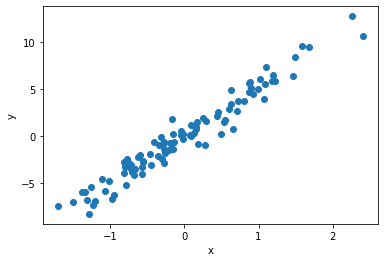

In [ ]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

##2. Model
Now we define the linear regression model

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

Initialize the model

In [ ]:
model = LinearRegression(1, 1)

Define the function to get the parameters of model and plot the line fit

In [ ]:
def get_params(Model):
  [w, b] = Model.parameters()
  return (w[0][0].item(), b[0].item())
def plot_fit(Model,X_axis):
  w1, b1 = get_params(Model)
  x1 = np.array([X_axis.min(), X_axis.max()])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

## 3. Plot the intialized fit line

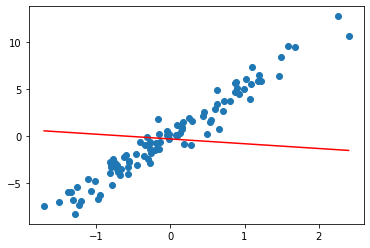

In [ ]:
plot_fit(model,X)

Now we define the optimizer/loss function

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## 4. Traning

In [ ]:
epochs = 1000
losses = []
for i in range(1,epochs+1):
   y_pred = model.forward(X)
   loss = criterion(y_pred, y)
   if i%100==0 :
    print("epoch:", i, "loss:", loss.item())
   losses.append(loss)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

epoch: 100 loss: 2.2215654850006104
epoch: 200 loss: 1.0278490781784058
epoch: 300 loss: 0.9624325633049011
epoch: 400 loss: 0.9588470458984375
epoch: 500 loss: 0.958650529384613
epoch: 600 loss: 0.9586397409439087
epoch: 700 loss: 0.9586392045021057
epoch: 800 loss: 0.9586390852928162
epoch: 900 loss: 0.9586390852928162
epoch: 1000 loss: 0.9586391448974609


##5. Plot the result fit line

5.053060054779053 0.07318699359893799


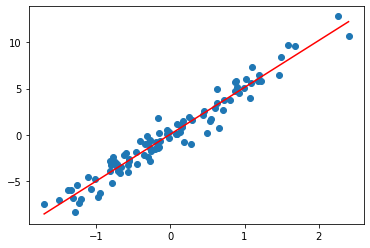

In [ ]:
w1, b1 = get_params(model)
print(w1,b1)
plot_fit(model,X)